# Polynomial regression

### Problem statement: Predicting the concrete compressive strength (in MPa) based on 8 factors, namely amount of cement, blast furnace slag, fly ash, water, superplasticizer, coarse aggregate, fine aggregate (all of these in the unit of kg, for every m^3 mixture) and age (in days). A linear model will be fit into this dataset, procured from UCI dataset repository.

In [263]:
#Import the relevant libraries that will be required
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

df = pd.read_excel('Concrete_Data.xls')
Xj = df[:1025] #Slicing the array to save the last training example for prediction
test_X = df[1025:1030]
y = np.array(Xj['Strength']).reshape(1025, 1)
test_y = np.array(test_X['Strength']).reshape(5, 1)
del Xj['Strength'] #The Xj array doesn't contain the y varaible values
del test_X['Strength']
print(Xj.head(), '\n')
print('Printing the corresponding values for strength of concrete:\n', y)
m = len(Xj) #Storing the number of training examples
print('The number of training examples in the data set:', m)

   Cement  Blast  Fly Ash  Water  Superplasticizer  Coarse Aggregate  \
0   540.0    0.0      0.0  162.0               2.5            1040.0   
1   540.0    0.0      0.0  162.0               2.5            1055.0   
2   332.5  142.5      0.0  228.0               0.0             932.0   
3   332.5  142.5      0.0  228.0               0.0             932.0   
4   198.6  132.4      0.0  192.0               0.0             978.4   

   Fine Aggregate  Age  
0           676.0   28  
1           676.0   28  
2           594.0  270  
3           594.0  365  
4           825.5  360   

Printing the corresponding values for strength of concrete:
 [[79.98611076]
 [61.88736576]
 [40.26953526]
 ...
 [41.54230795]
 [39.45595358]
 [37.91704314]]
The number of training examples in the data set: 1025


In [264]:
X0 = np.ones(len(Xj), dtype = float).reshape(1025, 1) #creating the X0 rows on 1s
X = np.append(X0, Xj, axis=1).reshape(1025, 9) #Creating the array with X0 coloumn
X = np.append(X, (Xj**2), axis=1).reshape(1025, 17) #Squaring all features and appending
X = np.append(X, (Xj**3), axis=1).reshape(1025, 25) #Creating the final X features array, by cubing all features and appending
#Here, observe that every eight features, we have added the squares and then cubes of the features.

In [265]:
#But since the features are too big, it will be harder for the algorithm to find the optimum minima. Therefore, features need
#to be scaled.
maximum = np.max(X, axis=0) #saving the coloumn-wise max values for test set
for i in range(25):
    X[:, i] /= np.max(X, axis=0)[i]
#The most basic form of normalisation was used, where all the training examples of each feature was divided by its respective
#maximum value, yielding all values to lie in between 0 and 1.

In [266]:
theta = np.zeros((25, 1)) #Initialising theta to zeros
def computeCost(X, y, theta):
    J = (1/(2*m))*(np.sum(np.square((X @ theta) - y)))
    return J;

print('The cost function output for all theta as zeros:', computeCost(X, y, theta))

The cost function output for all theta as zeros: 781.9315016079057


In [267]:
theta = np.zeros((25, 1)) #Initialising theta to zeros
alpha = 0.35
iterations = 2200 #we will run our gradient descent for these iterations

def gradientDescent(X, y, theta, alpha, iterations, m):
    J_history = np.zeros(iterations).reshape(iterations, 1)
    for iter in range(iterations):
        theta = theta - ((alpha/m)*(X.transpose() @ ((X @ theta)-y)))
        J_history[iter] = computeCost(X, y, theta)
    return [theta, J_history]

returned = gradientDescent(X, y, theta, alpha, iterations, m)
theta = returned[0]
J_history = returned[1]

print("Printing the theta vector:\n", theta)

Printing the theta vector:
 [[ 10.14583936]
 [ 44.29169908]
 [ 34.37037524]
 [ 13.42711161]
 [-11.16269072]
 [ 25.32167733]
 [  3.58877356]
 [  7.53079185]
 [100.04691349]
 [ 15.31905941]
 [ -2.84371406]
 [ -1.58825385]
 [-15.97402309]
 [-18.16899201]
 [ -0.88976025]
 [ -0.53998354]
 [-35.55586198]
 [ -8.47351332]
 [-14.76617816]
 [ -9.14893251]
 [-12.04172017]
 [-16.34521058]
 [ -3.99737266]
 [ -9.7568461 ]
 [-42.40575332]]


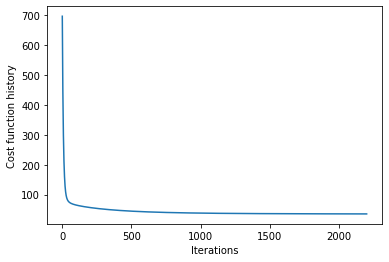

In [268]:
#We will also plot the value of the cost function after each iteration, to see the value reach a minimum and converge to a
#stabalised value
plt.xlabel('Iterations')
plt.ylabel('Cost function history')
plt.plot(range(2200), J_history)

In [269]:
#As we can see, the model has converged into a constant value, that means our regression model is created sucessfully.
#Let's compare the results with the actual values.
#We will consider our test set and compare our training model values with the the original.

test_X0 = np.ones(len(test_X), dtype = float).reshape(5, 1) #creating the X0 rows on 1s
test = np.append(test_X0, test_X, axis=1).reshape(5, 9) #Adding the coloumn of 1s for X0
test = np.append(test, (test_X**2), axis=1).reshape(5, 17) #Squaring all features and appending
test = np.append(test, (test_X**3), axis=1).reshape(5, 25) #Creating the final test sets by cubing an appending
for i in range(25):
    test[:, i] /= maximum[i] #normalising the features here as well
prediction = test @ theta
std_deviation = math.sqrt((np.sum(np.square(test_y-prediction)))/5)
print('The values for each of the test set examples in an array is:\n', prediction)
print('Comparing the original values in our test set:\n', test_y)
print('The standard deviation of the values is:', std_deviation)

The values for each of the test set examples in an array is:
 [[43.85014869]
 [35.02770197]
 [29.25184778]
 [32.98029434]
 [35.77978533]]
Comparing the original values in our test set:
 [[44.284354  ]
 [31.1787942 ]
 [23.69660064]
 [32.76803638]
 [32.40123514]]
The standard deviation of the values is: 3.3859430262335364
